In [1]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils as util
from construct_model_matrices import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [2]:
DATA_DIR = '../../data/Xy_internal_split_data'

In [3]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR)
data_sets = matrix_constructor.construct_model_matrices()

Train:
  ['X_train_2003.csv', 'X_train_2009.csv'] 
  ['y_train_2003.csv', 'y_train_2009.csv']
Valid:
  ['X_valid_2003.csv', 'X_valid_2009.csv'] 
  ['y_valid_2003.csv', 'y_valid_2009.csv']
Test:
  ['X_test_2003.csv', 'X_test_2009.csv'] 
  ['y_test_2003.csv', 'y_test_2009.csv']
Loading data from ['X_train_2003.csv', 'X_train_2009.csv']...
Loading data from ['X_valid_2003.csv', 'X_valid_2009.csv']...
Loading data from ['X_test_2003.csv', 'X_test_2009.csv']...
Loading data from ['y_train_2003.csv', 'y_train_2009.csv']...
Loading data from ['y_valid_2003.csv', 'y_valid_2009.csv']...
Loading data from ['y_test_2003.csv', 'y_test_2009.csv']...
Attempting to fill NAs with average of neighboring cells.
Could not fill density for 6 rows.
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Attempting to fill NAs with average of neighboring cells.
Could not fill density for 28 rows.
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Attempting to fill NAs wit

In [4]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [5]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)

Train:
 X: (52898, 232)
 y: (52898, 1)
Valid:
 X: (40128, 232)
 y: (40128, 1)
Test:
 X: (17086, 232)
 y: (17086, 1)


In [6]:
print('NAs:')
for field in list(X_train):
    n_na = sum(np.isnan(X_train[field]))
    if n_na:
        print('%s:\t%d' % (field, n_na))

NAs:


In [7]:
max(X_test.x), max(X_test.y)

(195, 360)

In [8]:
X_train.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,summerP1:PPT,summerP2:Pmean,summerP2:PPT,Pmean:POctSep,Pmean:PcumOctSep,Pmean:PPT,POctSep:PcumOctSep,POctSep:PPT,PcumOctSep:PPT,btl_t1:btl_t2
0,37,69,-119.110980,35.837349,141,0,0,0,0.0,685.590759,...,0.0,71.246358,8313.731294,1274.712659,2384.219847,10727.534453,33059.173593,148746.108359,278214.404698,0
1,38,69,-119.003126,35.859120,194,0,0,1,0.0,6174.752441,...,0.0,87.973222,10877.875727,1495.543933,2667.459467,12075.598338,40849.047960,184923.783018,329830.963074,0
2,39,69,-118.895219,35.880769,292,0,0,1,0.0,7538.154297,...,0.0,109.357355,14074.139083,1768.376840,3059.531818,13847.487076,50284.329646,227587.633142,393757.478054,0
3,40,69,-118.787258,35.902297,635,0,0,1,0.0,10577.365234,...,0.0,159.414539,20005.629382,2353.903810,4064.747016,17891.767901,67110.931910,295401.709572,510102.924386,0
4,41,69,-118.679245,35.923705,1250,1,1,1,38.0,41283.019531,...,0.0,268.615209,30930.918463,3727.077521,6608.496303,27649.504627,102576.042767,429171.272713,760965.328241,1


In [10]:
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'density', cell_dim=1)
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'density', cell_dim=1)
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'density', cell_dim=1)

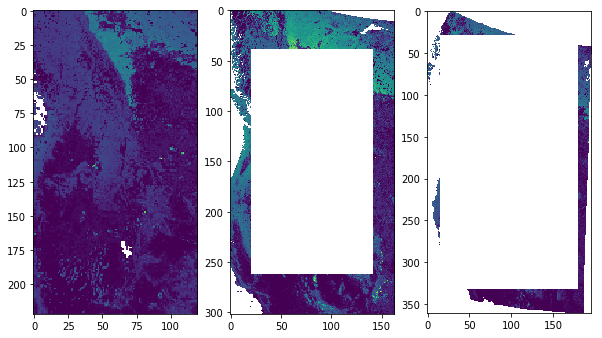

In [11]:
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [13]:
btl_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'btl_t1', cell_dim=1)
btl_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'btl_t1', cell_dim=1)
btl_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'btl_t1', cell_dim=1)

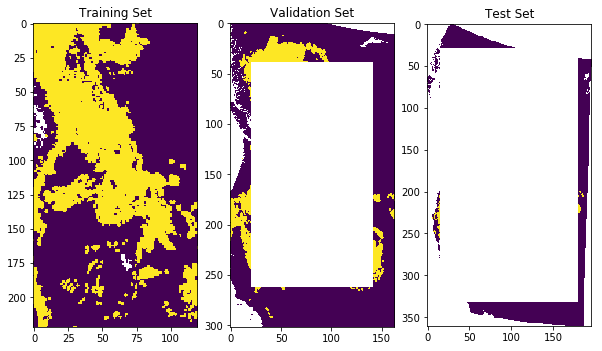

In [14]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [9]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 33.03%
Percent presence in y_valid: 10.32%
Percent presence in y_test: 1.44%


In [10]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 33.03)
print('  valid:', 100 - 10.31)
print('  test: ', 100 - 1.44)

Baseline accuracy if predicting "absent" for all cells:
  train: 66.97
  valid: 89.69
  test:  98.56


In [11]:
full_test = X_test.copy()
full_test['btl_t'] = y_test['btl_t']

In [12]:
drop = ['x', 'y', 'year']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [13]:
predictors = list(X_train)

In [14]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [15]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [16]:
y_train = y_train['btl_t'].values.reshape(-1)
y_valid = y_valid['btl_t'].values.reshape(-1)
y_test  = y_test['btl_t'].values.reshape(-1)

In [19]:
# Find optimal regularization via best validation-set accuracy
#l1_mods = []
l2_mods = []
Cs = np.logspace(-4, 0, 5)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l2']: #['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        #if penalty == 'l1':
        #    l1_mods.append(accuracy)
        #else:
        l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l2: 0.952
Elapsed time: 0.04 minutes
Testing C = 0.001
  l2: 0.9554
Elapsed time: 0.08 minutes
Testing C = 0.01
  l2: 0.9434
Elapsed time: 0.17 minutes
Testing C = 0.1
  l2: 0.9316
Elapsed time: 0.29 minutes
Testing C = 1.0
  l2: 0.8968
Elapsed time: 0.62 minutes


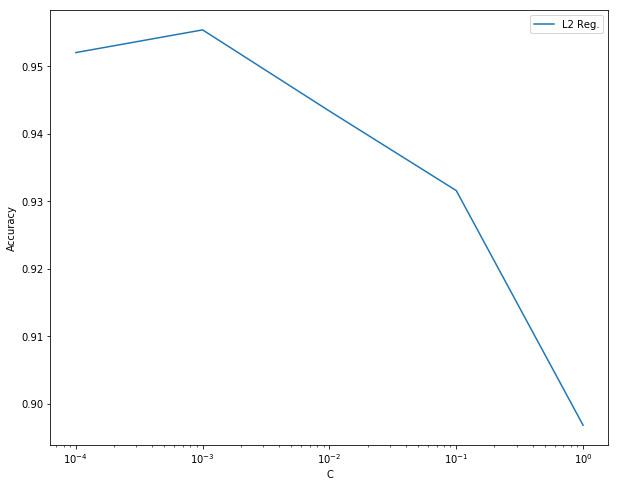

In [21]:
#plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [25]:
l1_mods = []
l2_mods = []
Cs = np.logspace(-3.5, -2.5, 10)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.000316227766017
  l1: 0.9528
Elapsed time: 0.02 minutes
  l2: 0.9559
Elapsed time: 0.06 minutes
Testing C = 0.000408423865267
  l1: 0.9532
Elapsed time: 0.08 minutes
  l2: 0.9563
Elapsed time: 0.12 minutes
Testing C = 0.00052749970637
  l1: 0.9531
Elapsed time: 0.13 minutes
  l2: 0.9563
Elapsed time: 0.18 minutes
Testing C = 0.000681292069058
  l1: 0.9538
Elapsed time: 0.20 minutes
  l2: 0.9562
Elapsed time: 0.24 minutes
Testing C = 0.000879922543569
  l1: 0.9537
Elapsed time: 0.26 minutes
  l2: 0.9559
Elapsed time: 0.31 minutes
Testing C = 0.00113646366639
  l1: 0.954
Elapsed time: 0.32 minutes
  l2: 0.9543
Elapsed time: 0.37 minutes
Testing C = 0.00146779926762
  l1: 0.9545
Elapsed time: 0.39 minutes
  l2: 0.9528
Elapsed time: 0.44 minutes
Testing C = 0.00189573565241
  l1: 0.9548
Elapsed time: 0.46 minutes
  l2: 0.9512
Elapsed time: 0.50 minutes
Testing C = 0.00244843674682
  l1: 0.9546
Elapsed time: 0.52 minutes
  l2: 0.9497
Elapsed time: 0.58 minutes
Testing C = 0.00

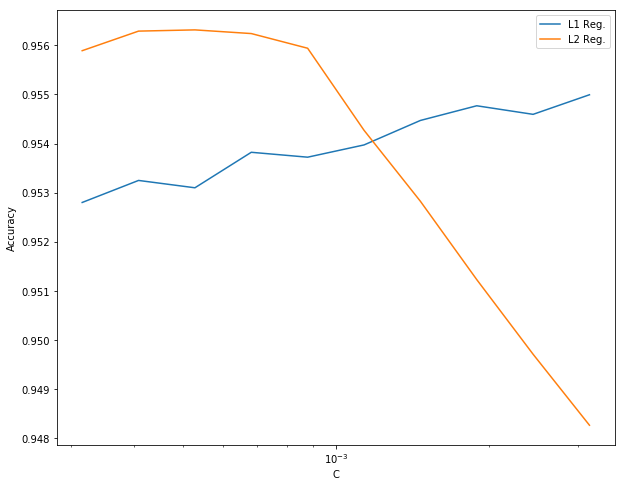

In [26]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [28]:
[(c, acc) for c, acc in zip(Cs, l2_mods)]

[(0.00031622776601683794, 0.95589114832535882),
 (0.00040842386526745213, 0.95628987240829344),
 (0.00052749970637026194, 0.95631479266347685),
 (0.00068129206905796151, 0.95624003189792661),
 (0.00087992254356910747, 0.95594098883572565),
 (0.0011364636663857243, 0.95427133173843703),
 (0.0014677992676220691, 0.95282595693779903),
 (0.0018957356524063754, 0.95123106060606055),
 (0.0024484367468222269, 0.94971092503987242),
 (0.0031622776601683794, 0.94826555023923442)]

In [29]:
best_C = 0.00052749970637026194

In [30]:
logistic_clf = LogisticRegression(C=best_C, penalty='l2')
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.99250848648015921

In [31]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[ 0.97788589  0.02211411]
 [ 0.97270289  0.02729711]
 [ 0.97440819  0.02559181]
 [ 0.97315832  0.02684168]
 [ 0.97983718  0.02016282]]


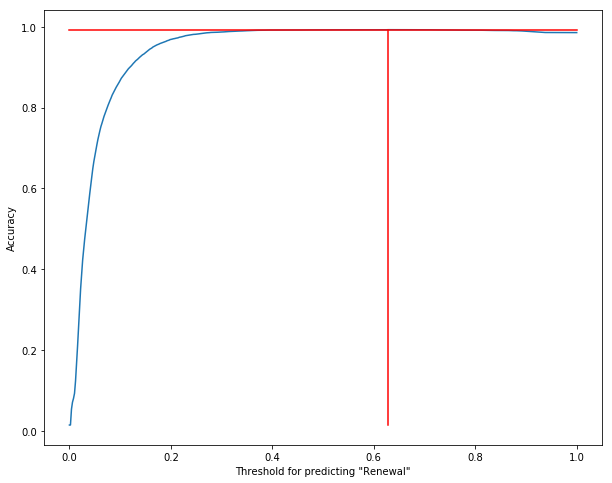

{'threshold': 0.62725450901803603, 'accuracy': 0.992801123727028}


In [32]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [33]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	182		64
        0	64		16776
Accuracy:  0.99250848648
Precision: 0.739837398374
Recall:    0.739837398374
F1:        0.739837398374


In [35]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	165		81
        0	42		16798
Accuracy:  0.992801123727
Precision: 0.797101449275
Recall:    0.670731707317
F1:        0.728476821192


In [36]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.986179103181


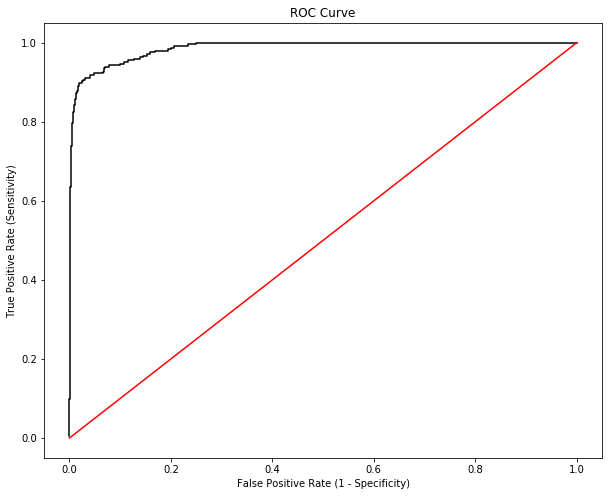

In [37]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [38]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
8,sum9_t1,0.578284
3,btl_t1,0.445214
9,sum9_t2,0.304247
5,vgt,0.268208
4,btl_t2,0.247457
228,btl_t1:btl_t2,0.176649
77,lat:etopo1,0.091632
48,OctTmin_sq,0.085175
1,lat,0.073580
68,lon:lat,-0.071063


In [39]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,Pmean:POctSep,Pmean:PcumOctSep,Pmean:PPT,POctSep:PcumOctSep,POctSep:PPT,PcumOctSep:PPT,btl_t1:btl_t2,btl_t,probs,preds
0,164,0,-104.671034,31.343318,1182,0,0,0,0.0,1513.529907,...,7728.515636,14722.520510,47478.045849,167774.444306,541048.847828,1.030677e+06,0,0,0.022114,0
1,165,0,-104.567392,31.348555,1348,0,0,0,0.0,3529.294678,...,9288.721479,17918.724079,56947.145630,200513.589331,637248.306400,1.229306e+06,0,0,0.027297,0
2,166,0,-104.463740,31.353674,1373,0,0,0,0.0,0.000000,...,9359.679818,18208.108228,57917.571668,199207.262723,633651.819883,1.232692e+06,0,0,0.025592,0
3,167,0,-104.360077,31.358676,1338,0,0,0,0.0,5712.242188,...,8819.522723,17290.923899,55501.409087,184260.186406,591449.019377,1.159553e+06,0,0,0.026842,0
4,168,0,-104.256404,31.363561,1154,0,0,0,0.0,509.230774,...,7772.170112,15359.644565,49922.198262,158397.422078,514826.204184,1.017418e+06,0,0,0.020163,0


In [40]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [43]:
def make_actual_pred_and_error_matrices(data, year, plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl_t')
    pred_matrix   = util.column2matrix(data_year, 'preds')
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

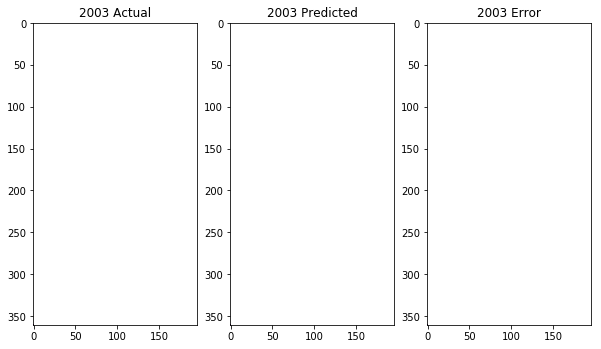

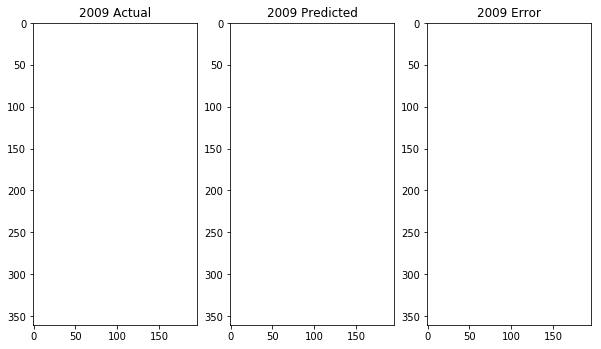

In [44]:
pred_years = [2003, 2009]
for year in pred_years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [50]:
data_2003 = full_test.loc[full_test.year == 2003, :]
data_2003.index = range(data_2003.shape[0])
data_2003.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,Pmean:POctSep,Pmean:PcumOctSep,Pmean:PPT,POctSep:PcumOctSep,POctSep:PPT,PcumOctSep:PPT,btl_t1:btl_t2,btl_t,probs,preds
0,164,0,-104.671034,31.343318,1182,0,0,0,0.0,1513.529907,...,4317.209479,9253.485995,27717.500868,92989.291465,278536.193619,597013.135386,0,0,0.017530,0
1,165,0,-104.567392,31.348555,1348,0,0,0,0.0,3529.294678,...,5590.312242,11939.615113,34918.668695,122006.122005,356819.823155,762084.686647,0,0,0.023363,0
2,166,0,-104.463740,31.353674,1373,0,0,0,0.0,0.000000,...,5736.847653,12305.245294,35579.566971,125423.308143,362650.795257,777867.438966,0,0,0.022684,0
3,167,0,-104.360077,31.358676,1338,0,0,0,0.0,5712.242188,...,5409.598393,11691.146596,33627.038610,118034.913185,339501.737522,733726.294401,0,0,0.023987,0
4,168,0,-104.256404,31.363561,1154,0,0,0,0.0,509.230774,...,4689.164749,10254.671347,29277.706302,101716.003745,290405.336566,635083.526176,0,0,0.017965,0


In [60]:
column = 'btl_1'
cell_dim = 1

df = data_2003.copy()
x_min = df.x.min()
y_min = df.y.min()
print(x_min, y_min)
df.x -= x_min
df.y -= y_min
xs = sorted(df.x.unique())
ys = sorted(df.y.unique())
matrix = np.array([[np.nan for y in range(len(ys))]
                   for x in range(len(xs))])

for row in df.index:
    x, y, value = df.loc[row, ['x', 'y', column]]
    i = int((x - xs[0]) / cell_dim)
    j = int((y - ys[0]) / cell_dim)
    print(x, y, i, j)
    matrix[i, j] = value

0 0
164.0 0.0 164 0
165.0 0.0 165 0
166.0 0.0 166 0
167.0 0.0 167 0
168.0 0.0 168 0
169.0 0.0 169 0
170.0 0.0 170 0
171.0 0.0 171 0
172.0 0.0 172 0
173.0 0.0 173 0
174.0 0.0 174 0
175.0 0.0 175 0
176.0 0.0 176 0
177.0 0.0 177 0
178.0 0.0 178 0
179.0 0.0 179 0
180.0 0.0 180 0
181.0 0.0 181 0
182.0 0.0 182 0
183.0 0.0 183 0
184.0 0.0 184 0
185.0 0.0 185 0
149.0 1.0 149 1
150.0 1.0 150 1
151.0 1.0 151 1
152.0 1.0 152 1
153.0 1.0 153 1
154.0 1.0 154 1
155.0 1.0 155 1
156.0 1.0 156 1
157.0 1.0 157 1
158.0 1.0 158 1
159.0 1.0 159 1
160.0 1.0 160 1
161.0 1.0 161 1
162.0 1.0 162 1
163.0 1.0 163 1
164.0 1.0 164 1
165.0 1.0 165 1
166.0 1.0 166 1
167.0 1.0 167 1
168.0 1.0 168 1
169.0 1.0 169 1
170.0 1.0 170 1
171.0 1.0 171 1
172.0 1.0 172 1
173.0 1.0 173 1
174.0 1.0 174 1
175.0 1.0 175 1
176.0 1.0 176 1
177.0 1.0 177 1
178.0 1.0 178 1
179.0 1.0 179 1
180.0 1.0 180 1
181.0 1.0 181 1
182.0 1.0 182 1
183.0 1.0 183 1
184.0 1.0 184 1
185.0 1.0 185 1
138.0 2.0 138 2
139.0 2.0 139 2
140.0 2.0 140 2
141.

KeyboardInterrupt: 